In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv(r"C:\Data\credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Exploratory Data Analysis Part

In [6]:
df.duplicated().value_counts()

False    32416
True       165
dtype: int64

In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.duplicated().value_counts()

False    32416
dtype: int64

In [9]:
#shape of dataframe
df.shape

(32416, 12)

In [10]:
# find null values
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
# Handeling Null Values of person employement length
df.person_emp_length.median()
df.person_emp_length.mean()

4.0

4.7905103238288556

In [12]:
df.person_emp_length.replace(np.nan,df.person_emp_length.mean,inplace=True)

In [13]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
# Handeling Null Values of loan interest rate
df.loan_int_rate.mean()
df.loan_int_rate.median()

11.017265100098276

10.99

In [15]:
df.loan_int_rate.replace(np.nan,df.loan_int_rate.mean(),inplace=True)

In [16]:
df.shape

(32416, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  object 
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 3.2+ MB


In [18]:
# Datatype object to float
df.person_emp_length = pd.to_numeric(df.person_emp_length, errors='coerce')

In [19]:
df.mean()
df.median()

person_age                       27.747008
person_income                 66091.640826
person_emp_length                 4.790510
loan_amnt                      9593.845632
loan_int_rate                    11.017265
loan_status                       0.218688
loan_percent_income               0.170250
cb_person_cred_hist_length        5.811297
dtype: float64

person_age                       26.000000
person_income                 55000.000000
person_emp_length                 4.000000
loan_amnt                      8000.000000
loan_int_rate                    11.017265
loan_status                       0.000000
loan_percent_income               0.150000
cb_person_cred_hist_length        4.000000
dtype: float64

In [20]:
df.std()
df.var()

person_age                        6.354100
person_income                 62015.580269
person_emp_length                 4.145490
loan_amnt                      6322.730241
loan_int_rate                     3.083040
loan_status                       0.413363
loan_percent_income               0.106812
cb_person_cred_hist_length        4.059030
dtype: float64

person_age                    4.037459e+01
person_income                 3.845932e+09
person_emp_length             1.718508e+01
loan_amnt                     3.997692e+07
loan_int_rate                 9.505136e+00
loan_status                   1.708690e-01
loan_percent_income           1.140880e-02
cb_person_cred_hist_length    1.647573e+01
dtype: float64

## Detecting and fixing outliers of person age column

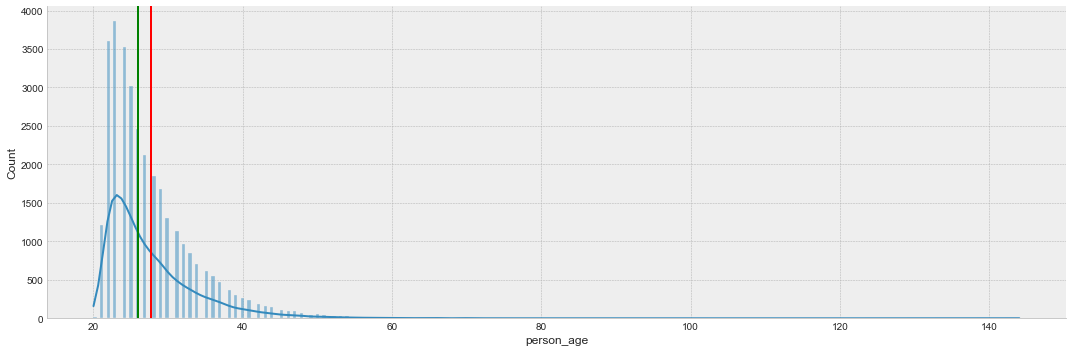

In [21]:
sns.displot(data = df,x = df.person_age,height=5,aspect=3,kde = True)
plt.axvline(df.person_age.mean(),color = 'red')
plt.axvline(df.person_age.median(),color = 'green')


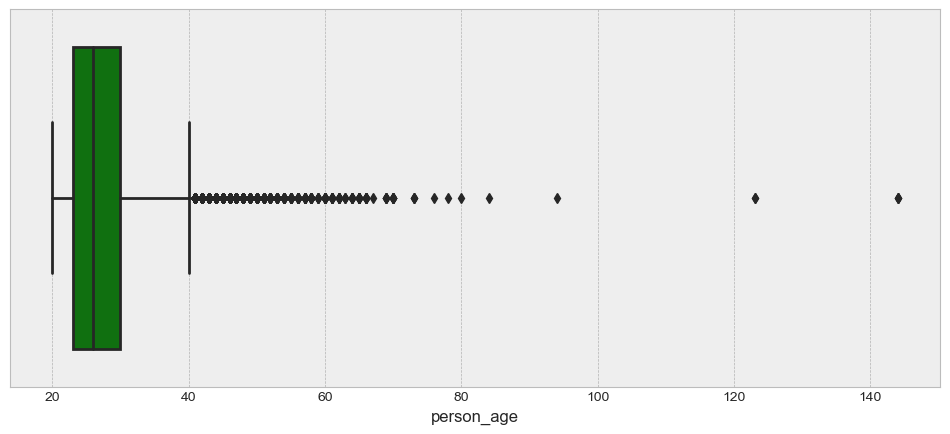

In [22]:
plt.figure(figsize=(12,5),dpi=100)
sns.boxplot(data = df, x=df.person_age,color = 'green');

In [23]:
q1,q2,q3 = tuple(df.person_age.quantile(q=[0.25,0.50,0.75]))

In [24]:
q1
q2
q3

23.0

26.0

30.0

In [25]:
IQR = q3-q1
UL = q3+1.5*IQR
LL = q1-1.5*IQR

In [26]:
IQR
UL
LL

7.0

40.5

12.5

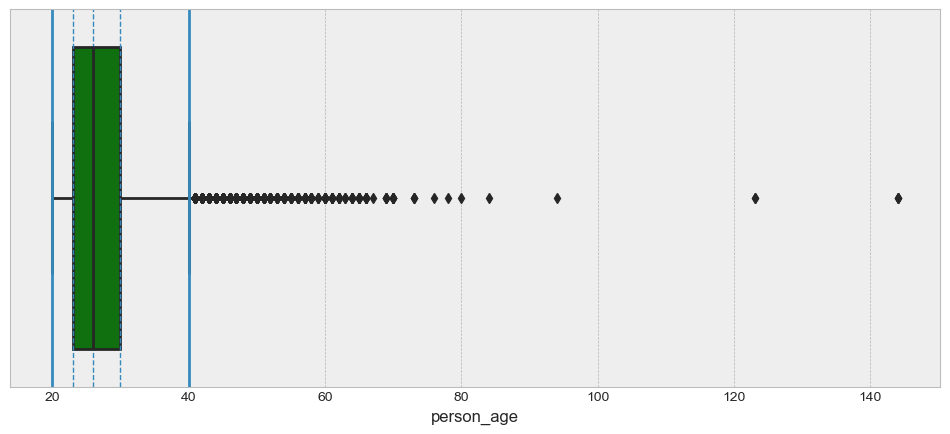

In [27]:
plt.figure(figsize=(12,5),dpi=100)
sns.boxplot(data = df, x=df.person_age,color = 'green')

plt.axvline(df[df.person_age>=LL]['person_age'].min())
plt.axvline(df[df.person_age<=UL]['person_age'].max())
plt.axvline(q1,lw=1,ls='--')
plt.axvline(q2,lw=1,ls='--')
plt.axvline(q3,lw=1,ls='--');

In [28]:
# This are the Outlier above upper limit of quantile range
(df[df.person_age>df[df.person_age<=UL]['person_age'].max()]['person_age'])

81       144
183      144
575      123
747      123
29121     50
        ... 
32576     57
32577     54
32578     65
32579     56
32580     66
Name: person_age, Length: 1491, dtype: int64

In [29]:
# Row having outliers
df[df.person_age>UL]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,11.017265,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.690000,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.160000,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.490000,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.990000,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.480000,0,0.10,N,26


In [30]:
new_df  = df[df['person_age']<UL]
new_df.shape

(30925, 12)

<Figure size 1200x500 with 0 Axes>

<AxesSubplot:xlabel='person_age', ylabel='person_emp_length'>

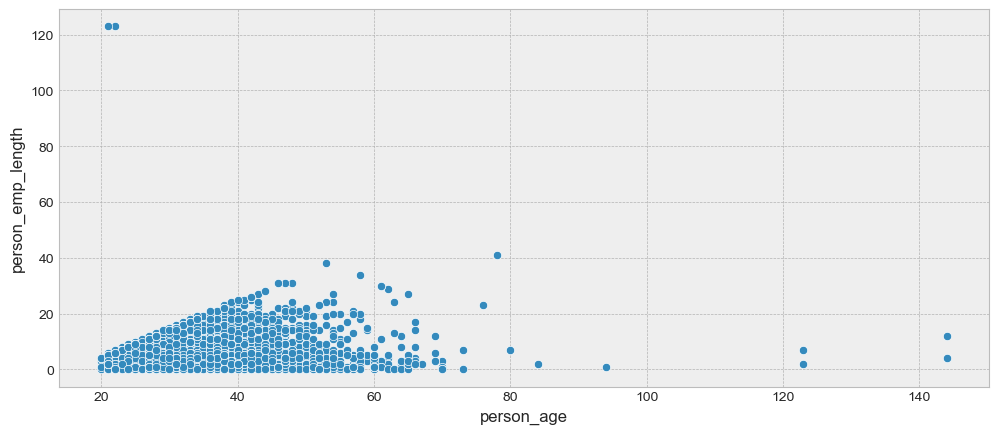

In [31]:
# Scatter plot for finding outliers in person age column
plt.figure(figsize=(12,5),dpi=100)
sns.scatterplot(data=df, x=df.person_age,y=df.person_emp_length)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.2+ MB


<Figure size 1152x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='person_age', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:>

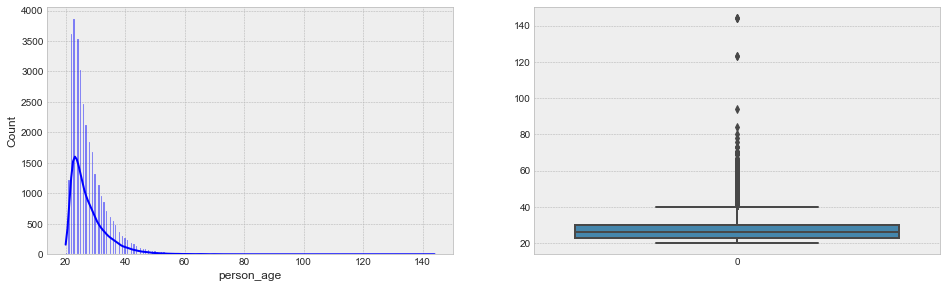

In [33]:
# Before outliers
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x=df.person_age,kde=True)
plt.subplot(2,2,2)
sns.boxplot(data=df.person_age)

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='person_age', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:>

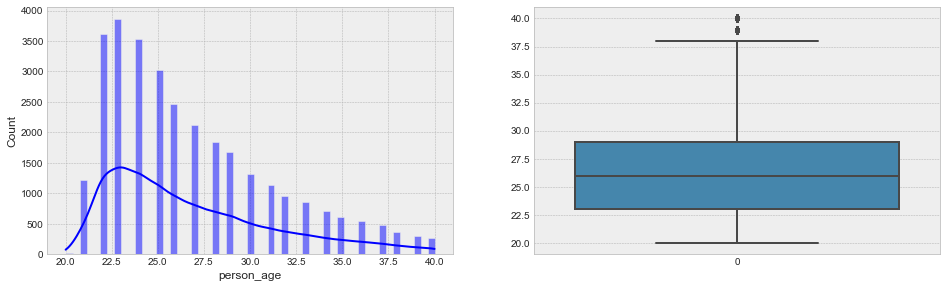

In [34]:
# After removing outliers
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(data=new_df,x=new_df.person_age,kde=True)
plt.subplot(2,2,2)
sns.boxplot(data=new_df.person_age)

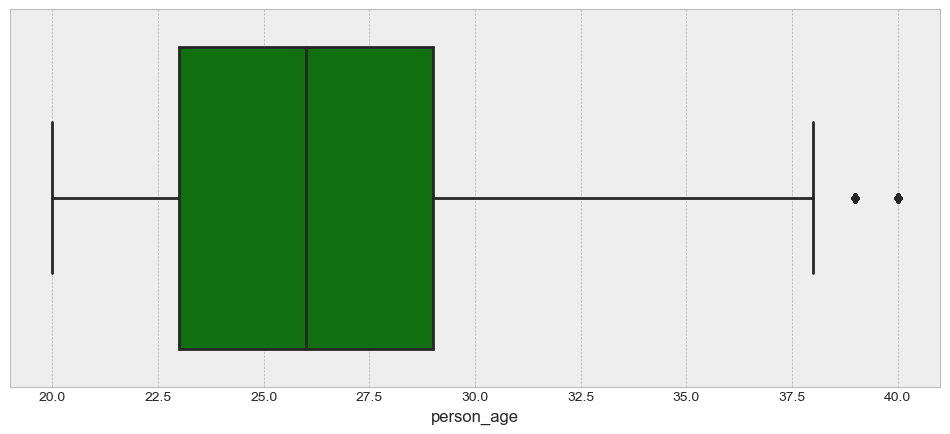

In [35]:
plt.figure(figsize=(12,5),dpi=100)
sns.boxplot(data = new_df, x=new_df.person_age,color = 'green');

## Detecting and fixing outliers of person income column

In [36]:
new_df.person_income.mean()
new_df.person_income.median()

65073.511786580435

55000.0

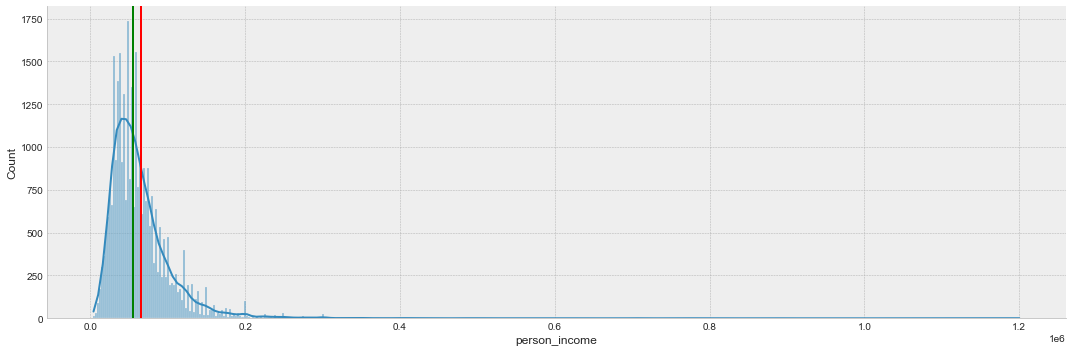

In [37]:
sns.displot(data = new_df,x = new_df.person_income,height=5,aspect=3,kde = True)
plt.axvline(new_df.person_income.mean(),color = 'red')
plt.axvline(new_df.person_income.median(),color = 'green')


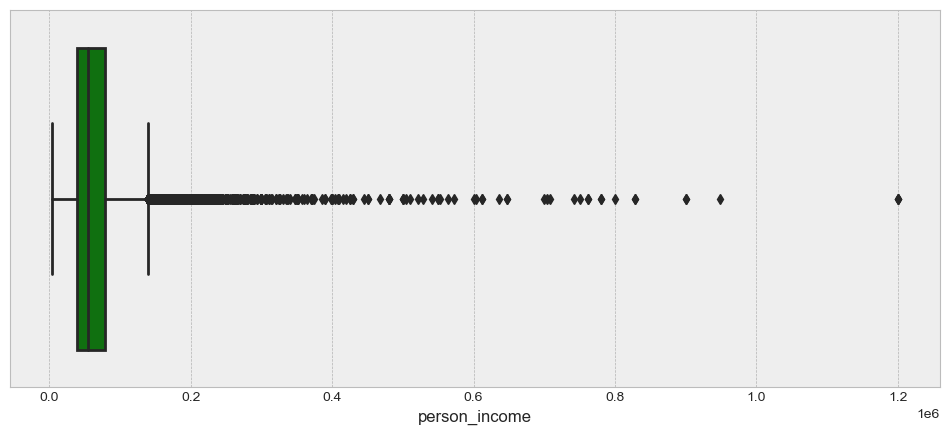

In [38]:
plt.figure(figsize=(12,5),dpi=100)
sns.boxplot(data = new_df, x=new_df.person_income,color = 'green');

<AxesSubplot:xlabel='person_income', ylabel='Count'>

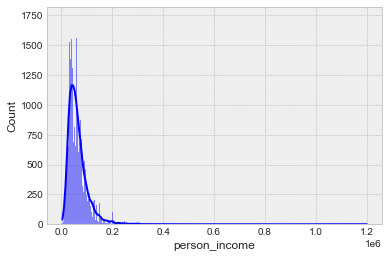

In [39]:
sns.histplot(data=new_df,x=new_df.person_income,kde = True)

<AxesSubplot:xlabel='person_income', ylabel='person_age'>

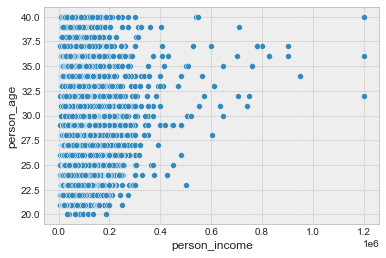

In [40]:
sns.scatterplot(data=new_df,x=new_df.person_income,y=new_df.person_age)

In [41]:
q1,q2,q3 = tuple(new_df.person_income.quantile(q=[0.25,0.50,0.75]))

In [42]:
q1
q2
q3

38400.0

55000.0

78750.0

In [43]:
IQR = q3-q1
UL = q3+1.5*IQR
LL = q1-1.5*IQR

In [44]:
IQR
UL
LL

40350.0

139275.0

-22125.0

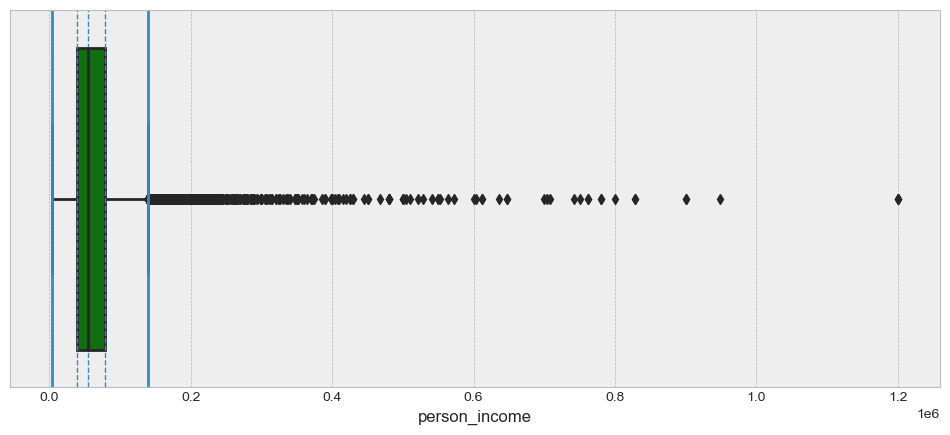

In [45]:
plt.figure(figsize=(12,5),dpi=100)
sns.boxplot(data = new_df, x=new_df.person_income,color = 'green')

plt.axvline(new_df[new_df.person_income>=LL]['person_income'].min())
plt.axvline(new_df[new_df.person_income<=UL]['person_income'].max())
plt.axvline(q1,lw=1,ls='--')
plt.axvline(q2,lw=1,ls='--')
plt.axvline(q3,lw=1,ls='--');

In [46]:
new_df[new_df['person_income']>UL]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4
33,25,306000,RENT,2.0,DEBTCONSOLIDATION,C,24250,13.85,0,0.08,N,3
34,26,300000,MORTGAGE,10.0,MEDICAL,C,7800,13.49,0,0.03,N,4
42,26,300000,MORTGAGE,10.0,VENTURE,A,20000,7.88,0,0.07,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32231,38,140000,MORTGAGE,0.0,VENTURE,B,25000,9.99,0,0.18,N,13
32249,36,160000,OWN,20.0,VENTURE,D,24000,14.96,0,0.15,Y,15
32253,39,325000,MORTGAGE,14.0,PERSONAL,D,18000,14.96,0,0.06,Y,17
32268,39,150000,MORTGAGE,9.0,MEDICAL,A,30000,8.90,0,0.20,N,11


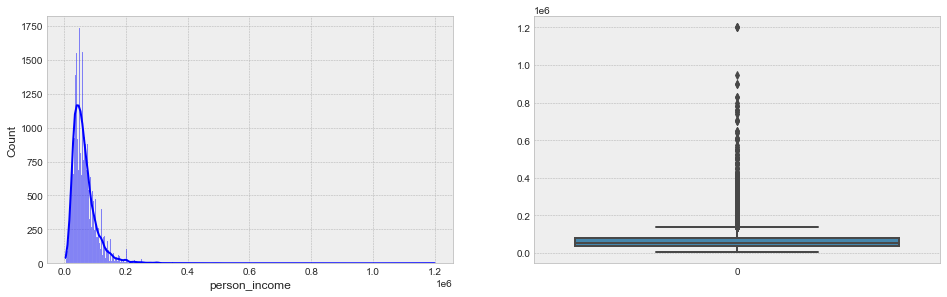

In [47]:
# Before outliers
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(data=new_df,x=new_df.person_income,kde=True)
plt.subplot(2,2,2)
sns.boxplot(data=new_df.person_income);

In [48]:
new_df = new_df[new_df['person_income']<UL]

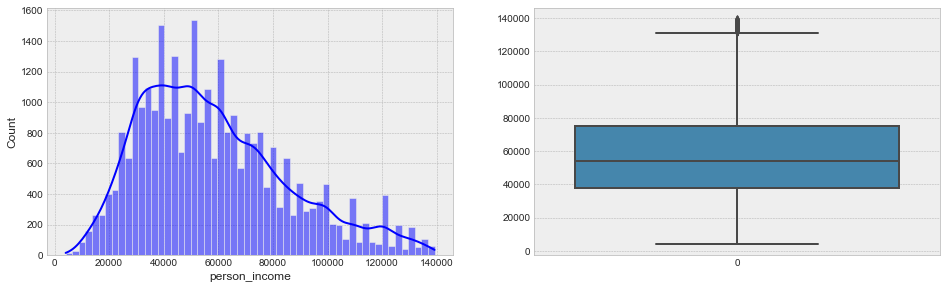

In [49]:
# After removing outliers
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(data=new_df,x=new_df.person_income,kde=True)
plt.subplot(2,2,2)
sns.boxplot(data=new_df.person_income);

## person employement length

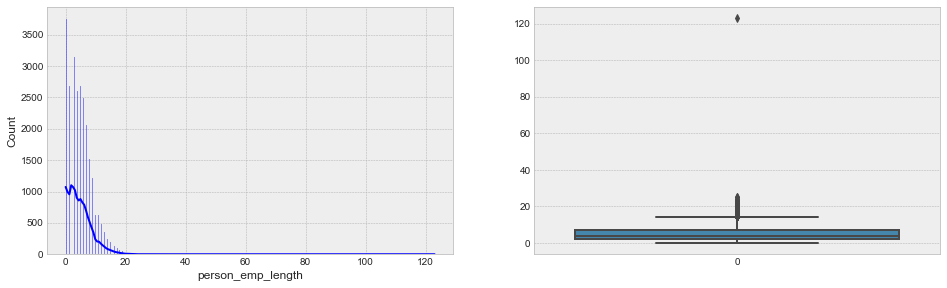

In [50]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(data=new_df,x=new_df.person_emp_length,kde=True)
plt.subplot(2,2,2)
sns.boxplot(data=new_df.person_emp_length);

In [51]:
new_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.020000,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.140000,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.870000,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.230000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.270000,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,11.017265,0,0.03,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.620000,0,0.04,N,15
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.990000,0,0.15,N,13
32294,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.290000,0,0.04,N,13


In [52]:
new_df[new_df['person_emp_length']>40]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3


In [57]:
new_df.drop(0,axis=0,inplace=True)


In [63]:
new_df = new_df.reset_index()


## Skewness of data

In [64]:
new_df.skew()

index                         0.060760
person_age                    0.974377
person_income                 0.710282
person_emp_length             1.057829
loan_amnt                     1.178694
loan_int_rate                 0.209578
loan_status                   1.315449
loan_percent_income           1.034396
cb_person_cred_hist_length    1.288670
dtype: float64

## Correlation and Heat Map

In [54]:
new_df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.092246,0.171029,0.037207,0.012102,-0.026869,-0.026886,0.836099
person_income,0.092246,1.000000,0.192307,0.384321,-0.033160,-0.255349,-0.329281,0.055061
person_emp_length,0.171029,0.192307,1.000000,0.103928,-0.059561,-0.082702,-0.040829,0.136047
loan_amnt,0.037207,0.384321,0.103928,1.000000,0.130204,0.123016,0.644358,0.024307
loan_int_rate,0.012102,-0.033160,-0.059561,0.130204,1.000000,0.318780,0.118945,0.016171
loan_status,-0.026869,-0.255349,-0.082702,0.123016,0.318780,1.000000,0.379336,-0.018288
loan_percent_income,-0.026886,-0.329281,-0.040829,0.644358,0.118945,0.379336,1.000000,-0.012324
cb_person_cred_hist_length,0.836099,0.055061,0.136047,0.024307,0.016171,-0.018288,-0.012324,1.000000


<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

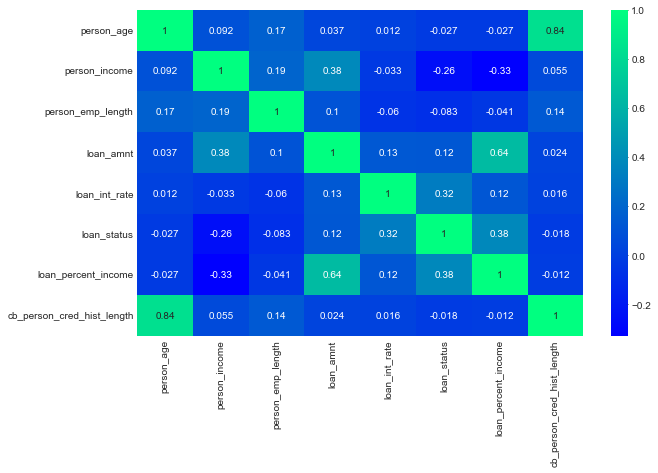

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(),cmap='winter',annot=True)

We can see that person age is directly proportional to person credit history length and similarly loan amount is directly proportional to loan percent income

# Data Visualization

<AxesSubplot:xlabel='loan_grade', ylabel='loan_amnt'>

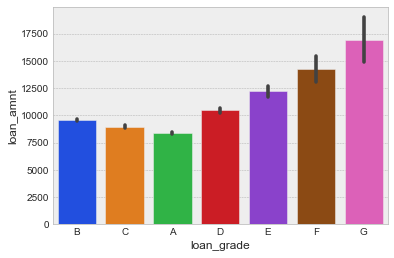

In [68]:
sns.barplot(data=new_df,x=new_df.loan_grade,y=new_df.loan_amnt, palette='bright')

We can see that if the loan amount is low have good grade i.e A similarly if loan amount is high loan grade is bad i.e G 

<AxesSubplot:xlabel='person_home_ownership', ylabel='person_income'>

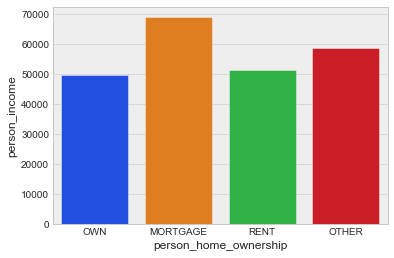

In [70]:
sns.barplot(data=new_df,x=new_df.person_home_ownership,y=new_df.person_income,ci = None ,palette='bright')

Those person who took their home on mortage have high income as compared to owner and rent person home ownership

# Count Plot

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

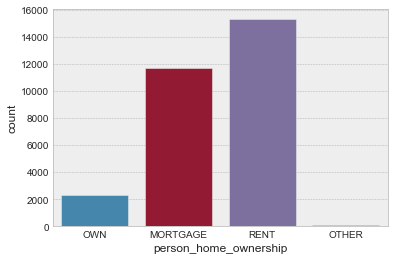

In [71]:
sns.countplot(data=new_df,x=new_df.person_home_ownership)

Maximum no peoples are on rent   

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

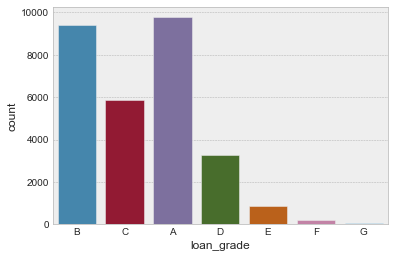

In [72]:
sns.countplot(data=new_df,x=new_df.loan_grade)

Maximum count of loan grade is of A category then after B categoory and so on.

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

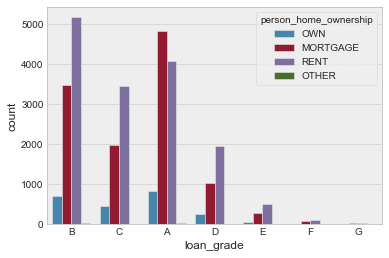

In [73]:
sns.countplot(data=new_df,x=new_df.loan_grade, hue=new_df.person_home_ownership)

Maximum count of Mortage categorical peoples are have A loan grade

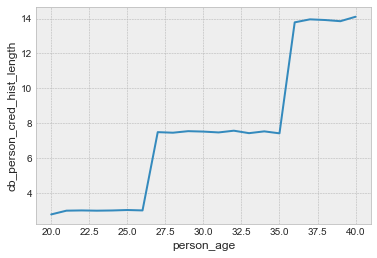

In [74]:
sns.lineplot(data = new_df, x = new_df.person_age, y = new_df.cb_person_cred_hist_length, ci = None);

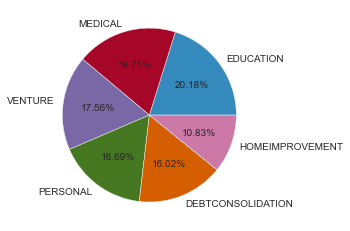

In [75]:
plt.pie(x = new_df.loan_intent.value_counts().values,
       labels = new_df.loan_intent.value_counts().index,
       autopct = '%.2f%%');

Maximum peoples take loan for education and for medical

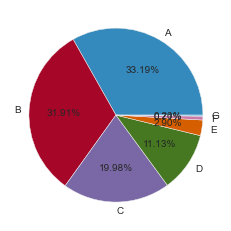

In [76]:
plt.pie(x = new_df.loan_grade.value_counts().values,
       labels = new_df.loan_grade.value_counts().index,
       autopct = '%.2f%%');

(array([ 643., 3903., 5947., 6041., 4672., 3530., 1832., 1400.,  995.,
         493.]),
 array([  4080.,  17592.,  31104.,  44616.,  58128.,  71640.,  85152.,
         98664., 112176., 125688., 139200.]),
 <BarContainer object of 10 artists>)

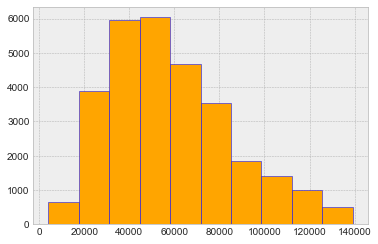

In [77]:
plt.hist(new_df.person_income, edgecolor = 'b', color= 'orange')

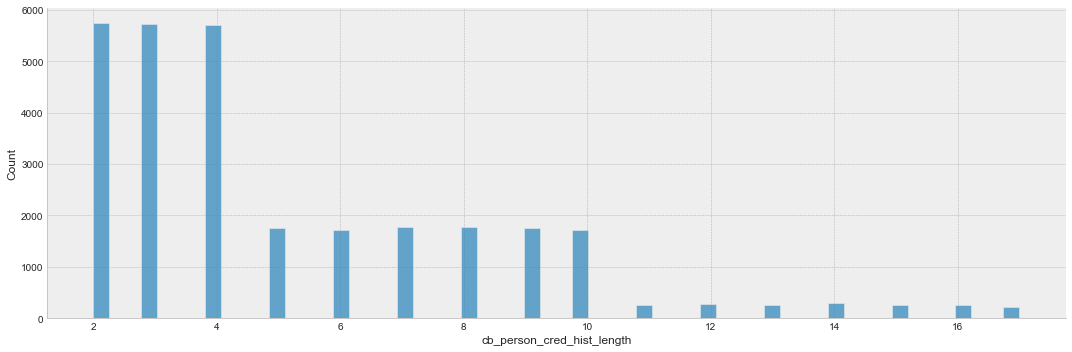

In [78]:
# Distribution plot
sns.displot(data = new_df, x = new_df.cb_person_cred_hist_length, height = 5, aspect = 15/5);